In [132]:
# Loading libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [133]:
df = pd.read_csv("/content/titanic-passengers.csv", sep = ";")

In [134]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [136]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [138]:
df.shape

(891, 12)

In [139]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
#Removing all null values row
df.dropna(how = "any",inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 881
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    object 
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 18.6+ KB


It can be seen above that I didn't focus in Data preprocessing, the only thing here is dropping roes contain null values 

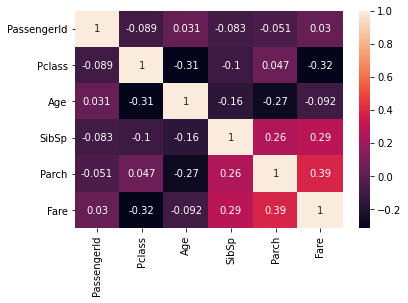

In [141]:
corr = df.corr()
sns.heatmap(corr, annot = True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


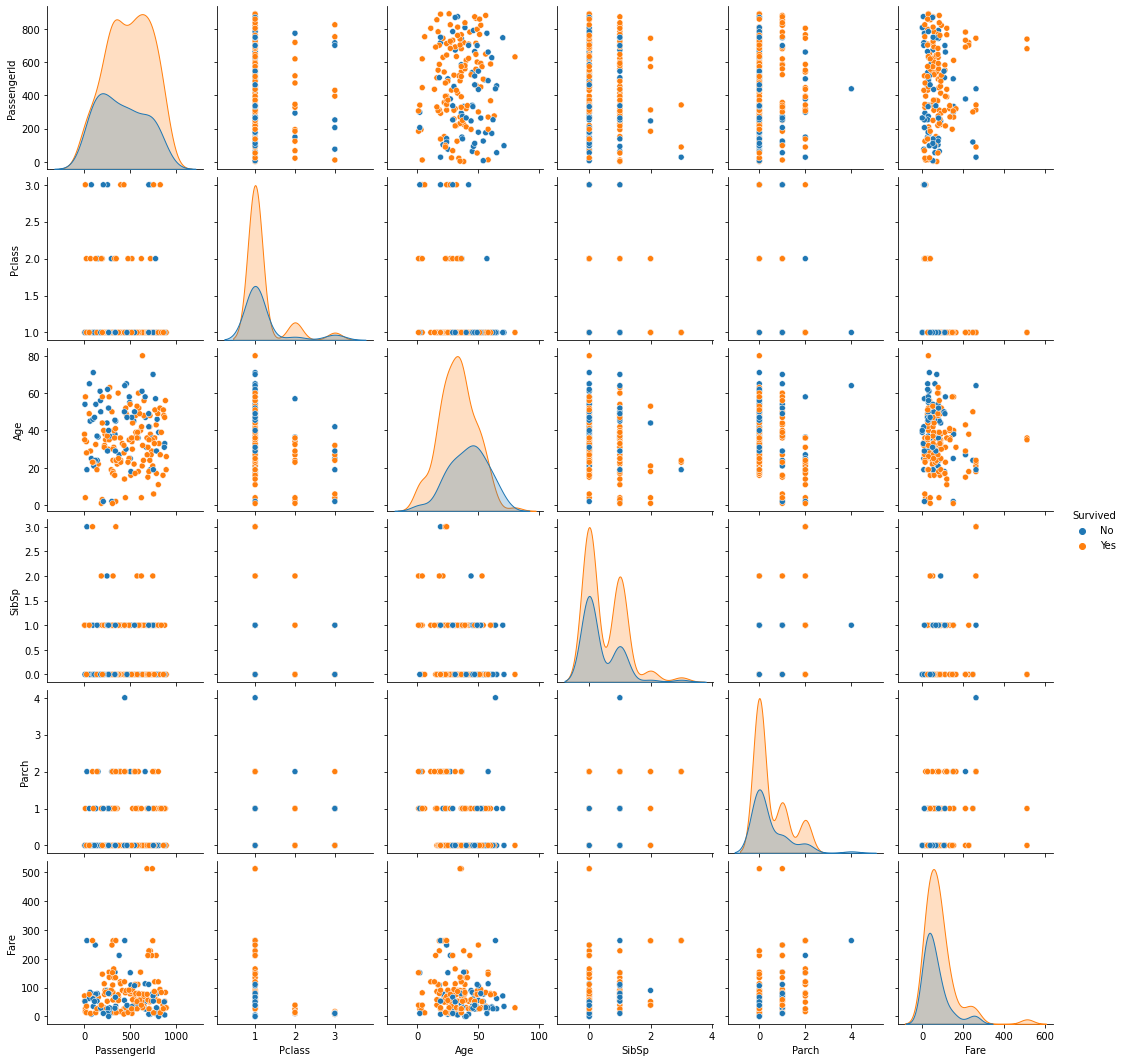

In [142]:
sns.pairplot(df, hue='Survived', size=2.5)

In [143]:
df["Survived"].value_counts()

Yes    123
No      60
Name: Survived, dtype: int64

# Label Encoder 
We will use the simplest method with `replace()`
Yes == 1
No == 0

In [144]:
df['Survived'].replace(["Yes","No"], [1,0], inplace=True)

In [145]:
df['Sex'].replace(["male","female"], [1,0], inplace=True)

In [146]:
df.Survived.value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [147]:
df.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S
16,378,0,1,"Widener, Mr. Harry Elkins",1,27.0,0,2,113503,211.5000,C82,C
19,225,1,1,"Hoyt, Mr. Frederick Maxfield",1,38.0,1,0,19943,90.0000,C93,S
26,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",1,60.0,1,1,13567,79.2000,B41,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,619,1,2,"Becker, Miss. Marion Louise",0,4.0,2,1,230136,39.0000,F4,S
863,858,1,1,"Daly, Mr. Peter Denis",1,51.0,0,0,113055,26.5500,E17,S
865,196,1,1,"Lurette, Miss. Elise",0,58.0,0,0,PC 17569,146.5208,B80,C
875,463,0,1,"Gee, Mr. Arthur H",1,47.0,0,0,111320,38.5000,E63,S


In [148]:
df.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
1,4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S
2,16,378,0,1,"Widener, Mr. Harry Elkins",1,27.0,0,2,113503,211.5000,C82,C
3,19,225,1,1,"Hoyt, Mr. Frederick Maxfield",1,38.0,1,0,19943,90.0000,C93,S
4,26,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",1,60.0,1,1,13567,79.2000,B41,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,862,619,1,2,"Becker, Miss. Marion Louise",0,4.0,2,1,230136,39.0000,F4,S
179,863,858,1,1,"Daly, Mr. Peter Denis",1,51.0,0,0,113055,26.5500,E17,S
180,865,196,1,1,"Lurette, Miss. Elise",0,58.0,0,0,PC 17569,146.5208,B80,C
181,875,463,0,1,"Gee, Mr. Arthur H",1,47.0,0,0,111320,38.5000,E63,S


In [149]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [150]:
x = df[['Pclass', 'Sex','Age','Fare']].values
y= df['Survived']

In [151]:
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inp_df = scaler.fit_transform(x)
#
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [152]:
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

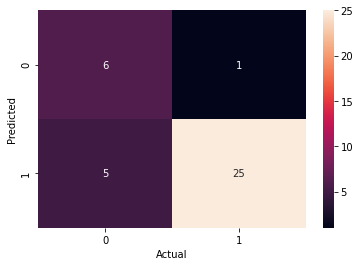

In [153]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)

This part is about `classification_report` :
For further info About **ROC** and **AUC** read below :
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [155]:
# Here we have the function classification_report to get al the results related to confusion matrix 
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.96      0.83      0.89        30

    accuracy                           0.84        37
   macro avg       0.75      0.85      0.78        37
weighted avg       0.88      0.84      0.85        37

